# Coursework Project
Data Pre-Processing for a Sales Forecasting Problem

DATA71011 Understanding Data and their Environment

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
dataTrain = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-data-forecast.csv')
testSet = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-testData.csv')

/var/folders/9q/x_qkm_295r77cyh7zn22pj3h0000gn/T/ipykernel_4868/2433977353.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataTrain = pd.read_csv('/Users/alexander/Documents/MSc Data Science/Understanding Data and their Environment/Assignment 2/final-data/final-data-forecast.csv')


### 1. Including Lagged Features

In [65]:
dataTrain['Date'] = pd.to_datetime(dataTrain['Date'])

In [67]:
dataTrain = dataTrain.sort_values(by=['Store', 'Date'])
dataTrain.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
239      1    Tuesday 2013-01-01      0          0     0      0   
217      1  Wednesday 2013-01-02   5530        668     1      0   
195      1   Thursday 2013-01-03   4327        578     1      0   
175      1     Friday 2013-01-04   4486        619     1      0   
762      1   Saturday 2013-01-05   4997        635     1      0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
239  Public Holiday              1    Type C      Basic                 1270   
217             NaN              1    Type C      Basic                 1270   
195             NaN              1    Type C      Basic                 1270   
175             NaN              1    Type C      Basic                 1270   
762             NaN              1    Type C      Basic                 1270   

     Promo2 CompetitionOpenDate  DiffTimeMonths PromoDate  DiffPromoTimeMonths  
239       0          2008-09-01              82       NaN                    0  
217       0          2008-09-01              82       NaN                    0  
195       0          2008-09-01              82       NaN                    0  
175       0          2008-09-01              82       NaN                    0  
762       0          2008-09-01              82       NaN                    0

In [69]:
# Create lagged features for each store
dataTrain['Lag_1'] = dataTrain.groupby('Store')['Sales'].shift(1)
dataTrain['Lag_7'] = dataTrain.groupby('Store')['Sales'].shift(7)
dataTrain['Rolling_Mean_7'] = dataTrain.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(7).mean())

In [71]:
# Count NaN values in lagged features
lagged_nan_counts = dataTrain[['Lag_1', 'Lag_7', 'Rolling_Mean_7']].isnull().sum()

# Display NaN counts for lagged features
print(lagged_nan_counts)

Lag_1             1115
Lag_7             7805
Rolling_Mean_7    7805
dtype: int64


In [73]:
dataTrain = dataTrain.dropna(subset=['Lag_1', 'Lag_7', 'Rolling_Mean_7'])
dataTrain.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
862      1    Tuesday 2013-01-08   5580        654     1      1          NaN   
66       1  Wednesday 2013-01-09   5471        626     1      1          NaN   
45       1   Thursday 2013-01-10   4892        615     1      1          NaN   
23       1     Friday 2013-01-11   4881        592     1      1          NaN   
1        1   Saturday 2013-01-12   4952        646     1      0          NaN   

     SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  \
862              1    Type C      Basic                 1270       0   
66               1    Type C      Basic                 1270       0   
45               1    Type C      Basic                 1270       0   
23               1    Type C      Basic                 1270       0   
1                0    Type C      Basic                 1270       0   

    CompetitionOpenDate  DiffTimeMonths PromoDate  DiffPromoTimeMonths  \
862          2008-09-01              82       NaN                    0   
66           2008-09-01              82       NaN                    0   
45           2008-09-01              82       NaN                    0   
23           2008-09-01              82       NaN                    0   
1            2008-09-01              82       NaN                    0   

      Lag_1   Lag_7  Rolling_Mean_7  
862  7176.0     0.0     3788.000000  
66   5580.0  5530.0     4585.142857  
45   5471.0  4327.0     4576.714286  
23   4892.0  4486.0     4657.428571  
1    4881.0  4997.0     4713.857143

### 2. Running Models

First, we will run ML models with all features. We will automatically assign zero to closed stores and use only the open stores for training. These are the variables that will be used for training:

+ DayOfWeek
+ Promo
+ StateHoliday
+ SchoolHoliday
+ StoreType
+ Assortment
+ CompetitionDistance
+ Promo2
+ DiffTimeMonths
+ DiffPromoTimeMonths

### 2.1. Label Econding

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [79]:
# Transform the 'DayOfWeek' column
dataTrain['DayOfWeek_encoded'] = label_encoder.fit_transform(dataTrain['DayOfWeek'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [81]:
# Transform 'Promo' column
dataTrain['Promo_encoded'] = label_encoder.fit_transform(dataTrain['Promo'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [83]:
# Transform the 'StateHoliday' column
dataTrain['StateHoliday_encoded'] = label_encoder.fit_transform(dataTrain['StateHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Christmas': 0, 'Easter Holiday': 1, 'Public Holiday': 2, nan: 3}


In [85]:
# Transform the 'SchoolHoliday' column
dataTrain['SchoolHoliday_encoded'] = label_encoder.fit_transform(dataTrain['SchoolHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [87]:
# Transform the 'StoreType' column
dataTrain['StoreType_encoded'] = label_encoder.fit_transform(dataTrain['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Type A': 0, 'Type B': 1, 'Type C': 2, 'Type D': 3}


In [89]:
# Transform the 'Assortment' column
dataTrain['Assortment_encoded'] = label_encoder.fit_transform(dataTrain['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Basic': 0, 'Extended': 1, 'Extra': 2}


In [91]:
# Only with open stores:
trainSet = dataTrain[dataTrain['Open'] == 1]

In [93]:
# Create a copy of trainSet
forecastTrain = trainSet.copy()

In [95]:
# Final train set:
columns_drop = [
    'Store', 'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment', 'CompetitionOpenDate','PromoDate','Promo' 
]
# Drop the columns
trainSet = trainSet.drop(columns=columns_drop)
trainSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date                   838814 non-null  datetime64[ns]
 1   Sales                  838814 non-null  int64         
 2   CompetitionDistance    838814 non-null  int64         
 3   Promo2                 838814 non-null  int64         
 4   DiffTimeMonths         838814 non-null  int64         
 5   DiffPromoTimeMonths    838814 non-null  int64         
 6   Lag_1                  838814 non-null  float64       
 7   Lag_7                  838814 non-null  float64       
 8   Rolling_Mean_7         838814 non-null  float64       
 9   DayOfWeek_encoded      838814 non-null  int64         
 10  Promo_encoded          838814 non-null  int64         
 11  StateHoliday_encoded   838814 non-null  int64         
 12  SchoolHoliday_encoded  838814 non-null  int64 

In [97]:
# List the original column names
columns = list(trainSet.columns)

# Reorder the columns, moving 'Lag_1', 'Lag_7', and 'Rolling_Mean_7' to the end
new_order = [col for col in columns if col not in ['Lag_1', 'Lag_7', 'Rolling_Mean_7']] + ['Lag_1', 'Lag_7', 'Rolling_Mean_7']

# Apply the new order to the DataFrame
trainSet = trainSet[new_order]

In [99]:
trainSet.head()

Date  Sales  CompetitionDistance  Promo2  DiffTimeMonths  \
862 2013-01-08   5580                 1270       0              82   
66  2013-01-09   5471                 1270       0              82   
45  2013-01-10   4892                 1270       0              82   
23  2013-01-11   4881                 1270       0              82   
1   2013-01-12   4952                 1270       0              82   

     DiffPromoTimeMonths  DayOfWeek_encoded  Promo_encoded  \
862                    0                  5              1   
66                     0                  6              1   
45                     0                  4              1   
23                     0                  0              1   
1                      0                  2              0   

     StateHoliday_encoded  SchoolHoliday_encoded  StoreType_encoded  \
862                     3                      1                  2   
66                      3                      1                  2   
45                      3                      1                  2   
23                      3                      1                  2   
1                       3                      0                  2   

     Assortment_encoded   Lag_1   Lag_7  Rolling_Mean_7  
862                   0  7176.0     0.0     3788.000000  
66                    0  5580.0  5530.0     4585.142857  
45                    0  5471.0  4327.0     4576.714286  
23                    0  4892.0  4486.0     4657.428571  
1                     0  4881.0  4997.0     4713.857143

### 2.2. Standarization of numerical variables

In [102]:
# Standardize only the numerical variables while keeping dummy variables and encoded factors intact:
from sklearn.preprocessing import MinMaxScaler

# List numerical variables to standardize
numerical_features = [
    'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths','Lag_1','Lag_7','Rolling_Mean_7'
]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply scaling to numerical features
scaled_values = scaler.fit_transform(trainSet[numerical_features])

# Replace original columns with scaled values
trainSet[numerical_features] = scaled_values

In [104]:
trainSet.tail()

Date  Sales  CompetitionDistance  Promo2  DiffTimeMonths  \
1016326 2015-07-27  10712              0.07028       1        0.024531   
1017033 2015-07-28   8093              0.07028       1        0.024531   
1017014 2015-07-29   7661              0.07028       1        0.024531   
1016992 2015-07-30   8405              0.07028       1        0.024531   
1016970 2015-07-31   8680              0.07028       1        0.024531   

         DiffPromoTimeMonths  DayOfWeek_encoded  Promo_encoded  \
1016326             0.535211                  1              1   
1017033             0.535211                  5              1   
1017014             0.535211                  6              1   
1016992             0.535211                  4              1   
1016970             0.535211                  0              1   

         StateHoliday_encoded  SchoolHoliday_encoded  StoreType_encoded  \
1016326                     3                      1                  3   
1017033                     3                      1                  3   
1017014                     3                      1                  3   
1016992                     3                      1                  3   
1016970                     3                      1                  3   

         Assortment_encoded     Lag_1     Lag_7  Rolling_Mean_7  
1016326                   1  0.000000  0.146398        0.171941  
1017033                   1  0.257804  0.122115        0.194449  
1017014                   1  0.194773  0.128565        0.209129  
1016992                   1  0.184376  0.148011        0.220404  
1016970                   1  0.202282  0.139973        0.231369

### 2.3. Exploring correlation between predictors

In [107]:
# Dropping ID columns
corrMatrix = trainSet.drop(['Sales','Date'], axis='columns')

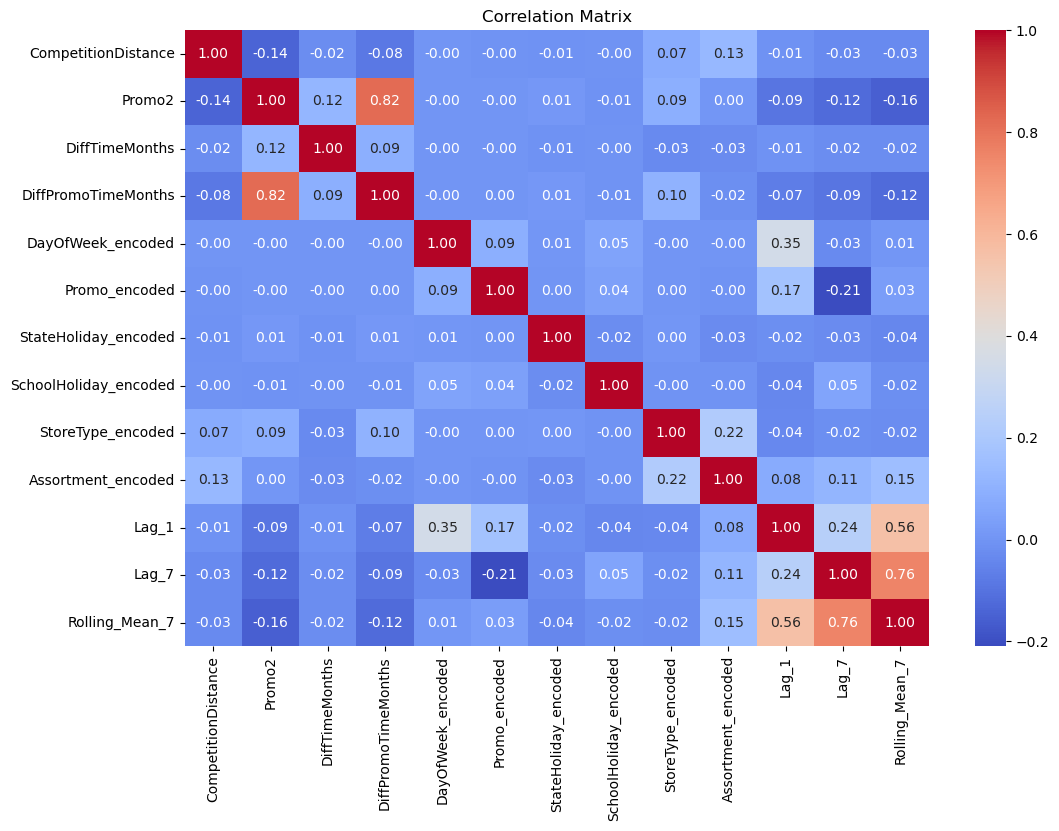

In [109]:
# Compute the correlation matrix
correlation_matrix = corrMatrix.corr()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 3. Machine Learning

#### 3.1. Training with all Features

In [113]:
from sklearn.model_selection import train_test_split

# Ensure data is sorted by Date
trainSet = trainSet.sort_values(by='Date')

# Define cutoff date for training and testing split
cutoff_date = '2015-01-01'

# Split into training and testing sets
train_data = trainSet[trainSet['Date'] < cutoff_date]
test_data = trainSet[trainSet['Date'] >= cutoff_date]

# Separate features and target
X_train = train_data.drop(columns=['Sales', 'Date'])
y_train = train_data['Sales']

X_test = test_data.drop(columns=['Sales', 'Date'])
y_test = test_data['Sales']

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (642782, 13)
X_test shape: (196032, 13)


In [115]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define RMSPE function
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0  # Avoid division by zero
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Create custom RMSPE scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

#### OLS

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Initialize OLS (LinearRegression)
ols = LinearRegression()

# Train the OLS model on the training set
ols.fit(X_train, y_train)

# Predict on the test set
y_test_pred = ols.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output the results
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


RMSPE on Test Set: 0.2794
R² on Test Set: 0.6912


#### Ridge Regression

In [121]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring function
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Create custom RMSPE scorer
rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set
ridge_grid.fit(X_train, y_train)

# Retrieve the best Ridge model
best_ridge = ridge_grid.best_estimator_

# Predict on the test set
y_test_pred = best_ridge.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


Best alpha: 100
RMSPE on Test Set: 0.2780
R² on Test Set: 0.6893


#### Lasso Regression

In [124]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize Lasso with GridSearchCV
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning
lasso_grid.fit(X_train, y_train)

# Retrieve the best Lasso model
best_lasso = lasso_grid.best_estimator_

# Predict on the test set
y_test_pred = best_lasso.predict(X_test)

# Evaluate RMSPE on the test set
test_rmspe = rmspe(y_test, y_test_pred)

# Evaluate R² on the test set
test_r2 = r2_score(y_test, y_test_pred)

# Output results
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe:.4f}")
print(f"R² on Test Set: {test_r2:.4f}")


Best alpha: 0.0001
RMSPE on Test Set: 0.2794
R² on Test Set: 0.6912


#### 3.2. Training with Selected Features

In [127]:
# Final train set:
columns_drop = [
    'Promo2','SchoolHoliday_encoded' 
]
# Drop the columns
trainSet_SF = trainSet.drop(columns=columns_drop)
trainSet_SF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  838814 non-null  datetime64[ns]
 1   Sales                 838814 non-null  int64         
 2   CompetitionDistance   838814 non-null  float64       
 3   DiffTimeMonths        838814 non-null  float64       
 4   DiffPromoTimeMonths   838814 non-null  float64       
 5   DayOfWeek_encoded     838814 non-null  int64         
 6   Promo_encoded         838814 non-null  int64         
 7   StateHoliday_encoded  838814 non-null  int64         
 8   StoreType_encoded     838814 non-null  int64         
 9   Assortment_encoded    838814 non-null  int64         
 10  Lag_1                 838814 non-null  float64       
 11  Lag_7                 838814 non-null  float64       
 12  Rolling_Mean_7        838814 non-null  float64       
dtypes

In [129]:
# Ensure data is sorted by Date
trainSet_SF = trainSet_SF.sort_values(by='Date')

# Define cutoff date for training and testing split
cutoff_date = '2015-01-01'

# Split into training and testing sets
train_data_SF = trainSet_SF[trainSet_SF['Date'] < cutoff_date]
test_data_SF = trainSet_SF[trainSet_SF['Date'] >= cutoff_date]

# Separate features and target
X_train_SF = train_data_SF.drop(columns=['Sales', 'Date'])
y_train_SF = train_data_SF['Sales']

X_test_SF = test_data_SF.drop(columns=['Sales', 'Date'])
y_test_SF = test_data_SF['Sales']

# Print shapes to confirm
print(f"X_train_SF shape: {X_train_SF.shape}")
print(f"X_test_SF shape: {X_test_SF.shape}")

X_train_SF shape: (642782, 11)
X_test_SF shape: (196032, 11)


#### OLS

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

# Initialize OLS (LinearRegression)
ols = LinearRegression()

# Train the OLS model on the training set with selected features
ols.fit(X_train_SF, y_train_SF)

# Predict on the test set with selected features
y_test_pred_SF = ols.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")


RMSPE on Test Set: 0.2806
R² on Test Set: 0.6886


#### Ridge Regression

In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.1, 1, 10, 100, 1000]}

# Initialize Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set with selected features
ridge_grid.fit(X_train_SF, y_train_SF)

# Retrieve the best Ridge model
best_ridge_SF = ridge_grid.best_estimator_

# Predict on the test set with selected features
y_test_pred_SF = best_ridge_SF.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")


Best alpha: 100
RMSPE on Test Set: 0.2792
R² on Test Set: 0.6868


#### Lasso Regression

In [138]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import numpy as np

# Define RMSPE scoring
def rmspe(y_true, y_pred):
    non_zero_mask = y_true != 0
    percentage_errors = ((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask]) ** 2
    return np.sqrt(np.mean(percentage_errors))

rmspe_scorer = make_scorer(rmspe, greater_is_better=False)

# Define parameter grid for alpha
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Initialize Lasso with GridSearchCV
lasso_grid = GridSearchCV(Lasso(max_iter=10000), param_grid, scoring=rmspe_scorer, cv=5)

# Perform CV and hyperparameter tuning on the training set with selected features
lasso_grid.fit(X_train_SF, y_train_SF)

# Retrieve the best Lasso model
best_lasso_SF = lasso_grid.best_estimator_

# Predict on the test set with selected features
y_test_pred_SF = best_lasso_SF.predict(X_test_SF)

# Evaluate RMSPE on the test set
test_rmspe_SF = rmspe(y_test_SF, y_test_pred_SF)

# Evaluate R² on the test set
test_r2_SF = r2_score(y_test_SF, y_test_pred_SF)

# Output the results
print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"RMSPE on Test Set: {test_rmspe_SF:.4f}")
print(f"R² on Test Set: {test_r2_SF:.4f}")

Best alpha: 0.0001
RMSPE on Test Set: 0.2806
R² on Test Set: 0.6886


### 4. Forecasting Sales

#### 4.1. Lagged Features

In [142]:
# Final train set:
columns_drop = [
    'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment', 'CompetitionOpenDate','PromoDate','Promo' 
]
# Drop the columns
forecastTrain = forecastTrain.drop(columns=columns_drop)
forecastTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838814 entries, 862 to 1016970
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  838814 non-null  int64         
 1   Date                   838814 non-null  datetime64[ns]
 2   Sales                  838814 non-null  int64         
 3   CompetitionDistance    838814 non-null  int64         
 4   Promo2                 838814 non-null  int64         
 5   DiffTimeMonths         838814 non-null  int64         
 6   DiffPromoTimeMonths    838814 non-null  int64         
 7   Lag_1                  838814 non-null  float64       
 8   Lag_7                  838814 non-null  float64       
 9   Rolling_Mean_7         838814 non-null  float64       
 10  DayOfWeek_encoded      838814 non-null  int64         
 11  Promo_encoded          838814 non-null  int64         
 12  StateHoliday_encoded   838814 non-null  int64 

In [144]:
# Sort forecastTrain by Store and Date
forecastTrain_sorted = forecastTrain.sort_values(by=['Store', 'Date'])

# Retrieve the last available raw sales (Lag_1) for each store
last_day_sales = forecastTrain_sorted.groupby('Store').tail(1).rename(columns={'Sales': 'Raw_Lag_1'})

# Retrieve sales from 7 days ago (Lag_7) for each store
seven_days_ago_sales = (
    forecastTrain_sorted.groupby('Store').tail(7)
    .groupby('Store')
    .head(1)
    .rename(columns={'Sales': 'Raw_Lag_7'})
)

# Merge raw lagged features into a single DataFrame
historical_sales = pd.merge(
    last_day_sales[['Store', 'Raw_Lag_1']],
    seven_days_ago_sales[['Store', 'Raw_Lag_7']],
    on='Store'
)

In [146]:
# Ensure forecastTrain is sorted by Store and Date
forecastTrain_sorted = forecastTrain.sort_values(by=['Store', 'Date'])

# Calculate the rolling mean (7 days) for each store
forecastTrain_sorted['Rolling_Mean_7'] = (
    forecastTrain_sorted.groupby('Store')['Sales']
    .rolling(window=7, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

# Retrieve the last available rolling mean for each store
rolling_mean_7 = (
    forecastTrain_sorted.groupby('Store').tail(1)[['Store', 'Rolling_Mean_7']]
)

In [148]:
# Merge the two tables on 'Store'
merged_data = pd.merge(
    left=rolling_mean_7,  # Replace with the name of the first table
    right=historical_sales,  # Replace with the name of the second table
    on='Store',
    how='inner'  # Use 'inner' join as both tables have the same number of entries for 'Store'
)

# Display the merged data
print(merged_data.head())

   Store  Rolling_Mean_7  Raw_Lag_1  Raw_Lag_7
0      1     4892.571429       5263       3706
1      2     5242.428571       6064       3854
2      3     7261.428571       8314       5080
3      4    10661.000000      13995       8322
4      5     4950.142857       4822       3815


In [150]:
# Rename the columns
merged_data = merged_data.rename(columns={
    'Store': 'Store',
    'Rolling_Mean_7': 'Rolling_Mean_7',
    'Raw_Lag_1': 'Lag_1',
    'Raw_Lag_7': 'Lag_7'
})

# Display the updated DataFrame
print(merged_data.head())

   Store  Rolling_Mean_7  Lag_1  Lag_7
0      1     4892.571429   5263   3706
1      2     5242.428571   6064   3854
2      3     7261.428571   8314   5080
3      4    10661.000000  13995   8322
4      5     4950.142857   4822   3815


In [152]:
# Merge the lagged features into testSet
testSet = pd.merge(testSet, merged_data, on='Store', how='left')

In [159]:
# List numerical variables to standardize
numerical_features = [
    'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths','Lag_1','Lag_7','Rolling_Mean_7'
]

# Apply scaling to numerical features
scaled_values = scaler.transform(testSet[numerical_features])

# Replace original columns with scaled values
testSet[numerical_features] = scaled_values

In [161]:
testSet.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1   Thursday  2015-09-17    NaN        NaN   1.0      1          NaN   
1      1  Wednesday  2015-08-19    NaN        NaN   1.0      1          NaN   
2      1   Thursday  2015-09-10    NaN        NaN   1.0      0          NaN   
3      1    Tuesday  2015-08-04    NaN        NaN   1.0      1          NaN   
4      1  Wednesday  2015-08-26    NaN        NaN   1.0      0          NaN   

   SchoolHoliday StoreType Assortment  CompetitionDistance  Promo2  \
0              0    Type C      Basic             0.016482       0   
1              1    Type C      Basic             0.016482       0   
2              0    Type C      Basic             0.016482       0   
3              1    Type C      Basic             0.016482       0   
4              1    Type C      Basic             0.016482       0   

   DiffTimeMonths  DiffPromoTimeMonths  Rolling_Mean_7     Lag_1     Lag_7  
0        0.059163                  0.0        0.166525  0.126664  0.089192  
1        0.059163                  0.0        0.166525  0.126664  0.089192  
2        0.059163                  0.0        0.166525  0.126664  0.089192  
3        0.059163                  0.0        0.166525  0.126664  0.089192  
4        0.059163                  0.0        0.166525  0.126664  0.089192

#### Running Best Lasso

In [157]:
trainSet.head()

Date  Sales  CompetitionDistance  Promo2  DiffTimeMonths  \
862    2013-01-08   5580             0.016482       0        0.059163   
881101 2013-01-08  11198             0.046677       1        0.015873   
689290 2013-01-08   9002             0.045227       0        0.080808   
531891 2013-01-08   4915             0.017669       1        0.009380   
245096 2013-01-08  10685             0.018855       0        0.008658   

        DiffPromoTimeMonths  DayOfWeek_encoded  Promo_encoded  \
862                0.000000                  5              1   
881101             0.309859                  5              1   
689290             0.000000                  5              1   
531891             0.830986                  5              1   
245096             0.000000                  5              1   

        StateHoliday_encoded  SchoolHoliday_encoded  StoreType_encoded  \
862                        3                      1                  2   
881101                     3                      0                  0   
689290                     3                      0                  0   
531891                     3                      1                  3   
245096                     3                      0                  0   

        Assortment_encoded     Lag_1  Lag_7  Rolling_Mean_7  
862                      0  0.172703    0.0        0.128929  
881101                   1  0.368198    0.0        0.244298  
689290                   1  0.292364    0.0        0.149171  
531891                   0  0.153330    0.0        0.109602  
245096                   0  0.309595    0.0        0.217341

In [163]:
from sklearn.linear_model import Lasso

# Extract features and target from the training set
X_full = trainSet.drop(columns=['Sales','Date'])  # Drop the target variable
y_full = trainSet['Sales']  # Define the target variable

# Initialize the Lasso model with the best alpha
best_lasso = Lasso(
    alpha=0.0001,      # Regularization strength
    max_iter=10000,    # Increase iterations to ensure convergence
    random_state=42    # Seed for reproducibility
)

# Train the Lasso model on the full training set
best_lasso.fit(X_full, y_full)

# Predict on the test set
y_pred = best_lasso.predict(X_full)
full_r2 = r2_score(y_full, y_pred)

# Output trained Lasso model
print("Lasso model trained with alpha = 0.0001")
print(full_r2)

Lasso model trained with alpha = 0.0001
0.6932052466423403


In [193]:
results_df = pd.DataFrame({
    'Observed Sales': y_full,
    'Predicted Sales': y_pred
})
results_df.head()

Observed Sales  Predicted Sales
862               5580      5535.562370
881101           11198      7831.589186
689290            9002      5719.498465
531891            4915      5037.872819
245096           10685      7282.895479

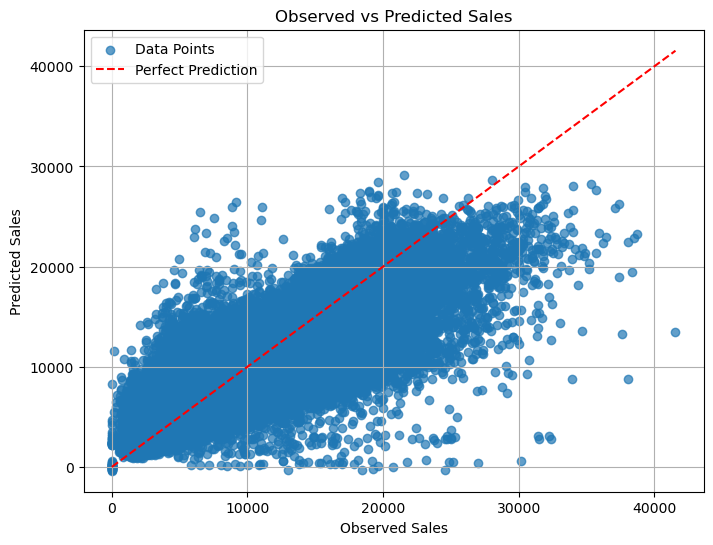

In [195]:
# Scatterplot of predicted vs observed values with improved labeling and diagonal reference line
plt.figure(figsize=(8, 6))
plt.scatter(results_df['Observed Sales'], results_df['Predicted Sales'], alpha=0.7, label="Data Points")
plt.plot(
    [results_df['Observed Sales'].min(), results_df['Observed Sales'].max()],
    [results_df['Observed Sales'].min(), results_df['Observed Sales'].max()],
    color='red', linestyle='--', label="Perfect Prediction"
)
plt.xlabel("Observed Sales")
plt.ylabel("Predicted Sales")
plt.title("Observed vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.show()


#### Preparing Test Set

In [165]:
# Transform the 'DayOfWeek' column
testSet['DayOfWeek_encoded'] = label_encoder.fit_transform(testSet['DayOfWeek'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}


In [167]:
# Transform 'Promo' column
testSet['Promo_encoded'] = label_encoder.fit_transform(testSet['Promo'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [169]:
# Define the custom mapping, including NaN explicitly
custom_mapping = {
    'Public Holiday': 2,
    np.nan: 3  # Explicitly handle NaN
}

# Use a lambda function to handle NaN values with map()
testSet['StateHoliday_encoded'] = testSet['StateHoliday'].apply(
    lambda x: custom_mapping.get(x, 3) if pd.isna(x) else custom_mapping.get(x)
)
print("Label Mapping:", custom_mapping)

Label Mapping: {'Public Holiday': 2, nan: 3}


In [171]:
# Transform the 'SchoolHoliday' column
testSet['SchoolHoliday_encoded'] = label_encoder.fit_transform(testSet['SchoolHoliday'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 0, 1: 1}


In [173]:
# Transform the 'StoreType' column
testSet['StoreType_encoded'] = label_encoder.fit_transform(testSet['StoreType'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Type A': 0, 'Type B': 1, 'Type C': 2, 'Type D': 3}


In [175]:
# Transform the 'Assortment' column
testSet['Assortment_encoded'] = label_encoder.fit_transform(testSet['Assortment'])

# Check the mapping of categories to integers
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label Mapping:", label_mapping)

Label Mapping: {'Basic': 0, 'Extended': 1, 'Extra': 2}


In [177]:
# Only with open stores. Use testSet for the final composition of data with closed stores.
forecasting_testSet = testSet[testSet['Open'] == 1]

In [179]:
# Final train set:
columns_drop = [
    'DayOfWeek','Customers', 'Open',
    'StateHoliday', 'SchoolHoliday', 'StoreType',
    'Assortment','Promo' 
]
# Drop the columns
forecasting_testSet = forecasting_testSet.drop(columns=columns_drop)
forecasting_testSet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35093 entries, 0 to 41087
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store                  35093 non-null  int64  
 1   Date                   35093 non-null  object 
 2   Sales                  0 non-null      float64
 3   CompetitionDistance    35093 non-null  float64
 4   Promo2                 35093 non-null  int64  
 5   DiffTimeMonths         35093 non-null  float64
 6   DiffPromoTimeMonths    35093 non-null  float64
 7   Rolling_Mean_7         35093 non-null  float64
 8   Lag_1                  35093 non-null  float64
 9   Lag_7                  35093 non-null  float64
 10  DayOfWeek_encoded      35093 non-null  int64  
 11  Promo_encoded          35093 non-null  int64  
 12  StateHoliday_encoded   35093 non-null  int64  
 13  SchoolHoliday_encoded  35093 non-null  int64  
 14  StoreType_encoded      35093 non-null  int64  
 15  Assortm

In [181]:
forecasting_testSet.head()

Store        Date  Sales  CompetitionDistance  Promo2  DiffTimeMonths  \
0      1  2015-09-17    NaN             0.016482       0        0.059163   
1      1  2015-08-19    NaN             0.016482       0        0.059163   
2      1  2015-09-10    NaN             0.016482       0        0.059163   
3      1  2015-08-04    NaN             0.016482       0        0.059163   
4      1  2015-08-26    NaN             0.016482       0        0.059163   

   DiffPromoTimeMonths  Rolling_Mean_7     Lag_1     Lag_7  DayOfWeek_encoded  \
0                  0.0        0.166525  0.126664  0.089192                  4   
1                  0.0        0.166525  0.126664  0.089192                  6   
2                  0.0        0.166525  0.126664  0.089192                  4   
3                  0.0        0.166525  0.126664  0.089192                  5   
4                  0.0        0.166525  0.126664  0.089192                  6   

   Promo_encoded  StateHoliday_encoded  SchoolHoliday_encoded  \
0              1                     3                      0   
1              1                     3                      1   
2              0                     3                      0   
3              1                     3                      1   
4              0                     3                      1   

   StoreType_encoded  Assortment_encoded  
0                  2                   0  
1                  2                   0  
2                  2                   0  
3                  2                   0  
4                  2                   0

#### Forecasting

In [183]:
# Ensure the test set is sorted by Store and Date
forecasting_testSet = forecasting_testSet.sort_values(by=['Store', 'Date'])

# Initialize a column for predicted sales
forecasting_testSet['Predicted_Sales'] = None

# Iterate over each store
for store in forecasting_testSet['Store'].unique():
    # Filter data for the current store
    store_data = forecasting_testSet[forecasting_testSet['Store'] == store].copy()
    
    # Initialize lagged features
    lag_1 = store_data.iloc[0]['Lag_1']  # Initial Lag_1 for the store
    lag_7 = store_data.iloc[0]['Lag_7']  # Initial Lag_7 for the store
    rolling_mean = store_data.iloc[0]['Rolling_Mean_7']  # Initial rolling mean
    
    # Iterate through each date for the store
    for idx in store_data.index:
        # Prepare features for the current prediction
        features = store_data.loc[idx, [
            'CompetitionDistance', 'DiffTimeMonths', 'DiffPromoTimeMonths',
            'DayOfWeek_encoded', 'Promo_encoded', 'StateHoliday_encoded',
            'SchoolHoliday_encoded', 'StoreType_encoded', 'Assortment_encoded','Promo2'
        ]].values
        
        # Add the current lagged features
        features = np.append(features, [lag_1, lag_7, rolling_mean])
        
        # Predict sales
        predicted_sales = best_lasso.predict([features])[0]
        
        # Save the prediction
        forecasting_testSet.loc[idx, 'Predicted_Sales'] = predicted_sales
        
        # Update lagged features
        lag_7 = lag_1  # Current Lag_1 becomes Lag_7
        lag_1 = predicted_sales  # Current prediction becomes Lag_1
        rolling_mean = ((rolling_mean * 7) - lag_7 + predicted_sales) / 7  # Update rolling mean


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with

In [185]:
forecasting_testSet.head()

Store        Date  Sales  CompetitionDistance  Promo2  DiffTimeMonths  \
19      1  2015-08-01    NaN             0.016482       0        0.059163   
9       1  2015-08-03    NaN             0.016482       0        0.059163   
3       1  2015-08-04    NaN             0.016482       0        0.059163   
37      1  2015-08-05    NaN             0.016482       0        0.059163   
21      1  2015-08-06    NaN             0.016482       0        0.059163   

    DiffPromoTimeMonths  Rolling_Mean_7     Lag_1     Lag_7  \
19                  0.0        0.166525  0.126664  0.089192   
9                   0.0        0.166525  0.126664  0.089192   
3                   0.0        0.166525  0.126664  0.089192   
37                  0.0        0.166525  0.126664  0.089192   
21                  0.0        0.166525  0.126664  0.089192   

    DayOfWeek_encoded  Promo_encoded  StateHoliday_encoded  \
19                  2              0                     3   
9                   1              1                     3   
3                   5              1                     3   
37                  6              1                     3   
21                  4              1                     3   

    SchoolHoliday_encoded  StoreType_encoded  Assortment_encoded  \
19                      1                  2                   0   
9                       1                  2                   0   
3                       1                  2                   0   
37                      1                  2                   0   
21                      1                  2                   0   

         Predicted_Sales  
19          11829.876942  
9        28581059.513885  
3     69107266101.474869  
37   167096984849439.125  
21  404029908238842240.0

In [585]:
# Export to a CSV file
forecasting_testSet.to_csv('forecasting_testSet.csv', index=False)